In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive"

'Adsız klasör'	    protein_ortak.ipynb
 Classes1.py	    SydneyHousePrices.csv
'Colab Notebooks'   VerilerinIncelenmesi-Oğuzhan.ipynb
 diabetes.csv	    Wine.ipynb
 Hitters.csv	    winemag-data_first150k.csv
 hmelq.csv	   "Wine's Data - PreProcessing.ipynb"
 HW_Data_Set.xlsx


In [ ]:
import pandas as pd 
import seaborn as sns
import missingno as msno
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import shapiro
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn import model_selection
from warnings import filterwarnings
from sklearn.neural_network import MLPRegressor,MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


filterwarnings("ignore")


In [ ]:
df = pd.read_csv("/content/drive/My Drive/hmelq.csv")
df.head(2)

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479


In [ ]:
from sklearn.preprocessing import LabelEncoder

df.dropna(inplace=True)
df1 = df.copy()

lbe = LabelEncoder()

df1["reason"] = lbe.fit_transform(df1["reason"])
df1  = pd.get_dummies(df1,columns= ["job"], prefix= ["job"])

y = df1["bad"]
X = df1.drop(["bad"],axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state = 42,
                                                 test_size = 0.25)




Results = cl.Methods()

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 19.5min finished


En iyi parametre degerleri:  {'max_depth': 10, 'max_features': 5, 'min_samples_split': 2, 'n_estimators': 10}
                                               
Tune oncesi Accuracy ve Confusion Matrix degerleri:  0.9584158415841584 
 [[466   0]
 [ 21  18]]
Tune sonrasi Accuracy ve Confusion Matrix degerleri:  0.9564356435643564 
 [[466   0]
 [ 22  17]]
                                                
(<matplotlib.axes._subplots.AxesSubplot object at 0x7f60280e5c50>, Text(0.5, 0, 'Değişken Önem Düzeyleri'))


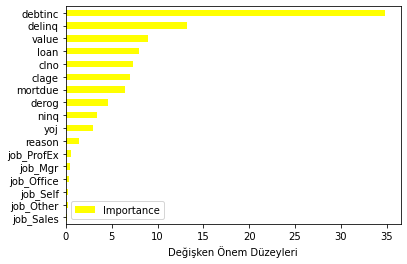

In [ ]:
Results.RandomForestsClass(X_train, y_train, X_test, y_test)

In [ ]:
# Simdi random forest yapisi kategorik olanlar icin daha iyi sonuc verebilmekte.
# Bazi degiskenleri donusturelim belli aralikta olceklendirip sonucta bir degisme var mi gozlemleyelim


In [ ]:
df["ninq"].value_counts()

0.0     1014
1.0      480
2.0      278
3.0      140
4.0       40
5.0       15
6.0       14
7.0       11
10.0      10
8.0        8
9.0        6
13.0       1
11.0       1
Name: ninq, dtype: int64

In [ ]:
A = df[df["ninq"] == 0].index
df.loc[A,"ninq"]= "A"

B = df[(df["ninq"] == 1) | (df["ninq"] == 2) | (df["ninq"] == 3)].index
df.loc[B,"ninq"]= "B"

C = df[(df["ninq"] == 4) | (df["ninq"] == 5) | (df["ninq"] == 6) | (df["ninq"] == 7) | (df["ninq"] == 8) | (df["ninq"] == 9) | (df["ninq"] == 10)
| (df["ninq"] == 11) | (df["ninq"] == 13)].index

df.loc[C,"ninq"]= "C"


# C sinifi kabalik oldu cunku SIKLIK derecesi dusuk olanlardan olusuyor

In [ ]:
df["ninq"].value_counts()

A    1014
B     898
C     106
Name: ninq, dtype: int64

In [ ]:
# Ayni islemleri bir diger numeric degisken Olan DEROG icin olceklendirme islemi yaparak iceriye verelim
df["derog"].value_counts()

0.0     1823
1.0      128
2.0       48
3.0       12
4.0        3
6.0        1
8.0        1
10.0       1
7.0        1
Name: derog, dtype: int64

In [ ]:


As = df[df["derog"] == 0].index
df.loc[As,"derog"]= "A"

es = df[(df["derog"] == 1) | (df["derog"] == 2) | (df["derog"] == 3)].index
df.loc[es,"derog"]= "B"

se = df[(df["derog"] == 4) | (df["derog"] == 5) | (df["derog"] == 6) | (df["derog"] == 7) | (df["derog"] == 8) | (df["derog"] == 9) | (df["derog"] == 10)].index
df.loc[se,"derog"]= "C"

In [ ]:
df["derog"].value_counts()

A    1823
B     188
C       7
Name: derog, dtype: int64

In [ ]:
# Simdi modeli tekrardan calistiriyorum

df = pd.get_dummies(df,columns= ["ninq"], prefix= ["ninq"])
df = pd.get_dummies(df,columns= ["derog"], prefix= ["derog"])


In [ ]:
df["reason"] = lbe.fit_transform(df1["reason"])
df  = pd.get_dummies(df,columns= ["job"], prefix= ["job"])

In [ ]:
y = df["bad"]
X = df.drop(["bad"],axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state = 42,
                                                 test_size = 0.25)


In [ ]:
X_train.head(2)

,loan,mortdue,value,reason,yoj,delinq,clage,clno,debtinc,ninq_A,ninq_B,ninq_C,derog_A,derog_B,derog_C,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
3128,8000,32100.0,36739.0,1,4.0,0.0,79.46,8.0,31.277,0,1,0,1,0,0,0,0,1,0,0,0
2996,34400,155536.0,169503.0,0,10.0,0.0,107.71,32.0,58.827,0,0,1,1,0,0,0,1,0,0,0,0


Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 14.7min finished


En iyi parametre degerleri:  {'max_depth': 10, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 500}
                                               
Tune oncesi Accuracy ve Confusion Matrix degerleri:  0.9603960396039604 
 [[466   0]
 [ 20  19]]
Tune sonrasi Accuracy ve Confusion Matrix degerleri:  0.9544554455445544 
 [[466   0]
 [ 23  16]]
                                                
(<matplotlib.axes._subplots.AxesSubplot object at 0x7f26937a08d0>, Text(0.5, 0, 'Değişken Önem Düzeyleri'))


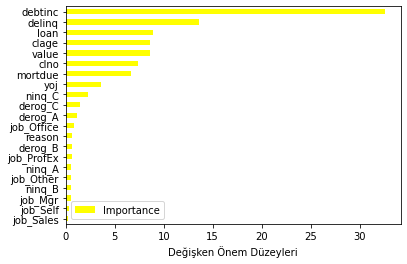

In [ ]:
import Classes1 as cl

Results = cl.Methods()
Results.RandomForestsClass(X_train, y_train, X_test, y_test)

In [ ]:
!ls "/content/drive/My Drive"

'Adsız klasör'	    protein_ortak.ipynb
 Classes1.py	    SydneyHousePrices.csv
'Colab Notebooks'   VerilerinIncelenmesi-Oğuzhan.ipynb
 diabetes.csv	    Wine.ipynb
 Hitters.csv	    winemag-data_first150k.csv
 hmelq.csv	   "Wine's Data - PreProcessing.ipynb"
 HW_Data_Set.xlsx


In [ ]:
# Diger foreks datasina gecelim

df_y = pd.read_excel("/content/drive/My Drive/HW_Data_Set.xlsx")
df_y.head(2)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_40,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,...,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,12.060000,9.1100,2,15,13,1,56,0.002690,-0.002670,0.000010,66.666667,93.692449,146.592674,150.505806,154.486989,158.009516,142.421114,142.023350,196.592517,184.819232,31.939605,3,30.752568,-5,-22,-22,-21,-23,-36,-40,...,97.980028,1.179209,-0.756946,98.905563,1.190348,99.156641,-0.000062,12.056738,-0.157039,20.967742,-0.000091,1.197238,-0.319064,0.0,0.0,0.0,0.0,0.0,0.0,-3.731343,-32.587430,-26.386973,-0.003323,0.045130,-0.044678,-44,-23,-27,0.002371,2.0,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,11.326667,9.2225,0,11,11,1,63,0.002729,-0.003111,-0.000191,66.666667,76.694104,140.227205,156.903278,161.604303,169.720843,152.634492,149.634976,201.738617,191.985663,38.478501,3,36.812130,-6,-18,-24,-24,-25,-38,-43,...,97.932319,1.179223,-0.756569,98.859627,1.190389,99.111914,-0.000062,11.971831,-0.156961,20.800000,-0.000091,1.197328,-0.318905,0.0,0.0,0.0,0.0,0.0,0.0,-1.369863,-38.115965,-26.085949,-0.000476,0.035314,-0.034961,-48,-16,-31,0.003074,0.8,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198


In [ ]:
df_y.loc[df_y[df_y["ind_420"] == "?"].index] = np.nan 

# Degisken donusturmeden once icerisinde NAN degerler oldugu icin ilk once bu OBJECT tipindeki degiskenlerin NAN degerlerini degistiriyoruz
# Ardindan donusum gercelestiriyoruz

df_y["ind_422"] = df_y["ind_422"].fillna(df_y.mean()["ind_422"])
df_y["ind_420"] = df_y["ind_420"].fillna(df_y.mean()["ind_420"])

df_y["ind_422"] = df_y["ind_422"].astype('int32')
df_y["ind_420"] = df_y["ind_420"].astype('int32')

# Geriye kalan NaN degiskenleri de dolduruyoruz

column = list(df_y.select_dtypes(include=["int32","float64"]))
df_y[column] = df_y[column].apply(lambda x: x.fillna(x.mean()),axis=0)

In [ ]:
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Columns: 136 entries, ind_5 to 90_target
dtypes: float64(133), int32(2), object(1)
memory usage: 6.4+ MB


In [ ]:
# Kalan son object tipindeki degiskeni de 1-0 haline getiriyoruz

df_y = pd.get_dummies(df_y,columns= ["ind_109"], prefix= ["ind_109"])

df_y = df_y.drop(["ind_109_RED"],axis=1)

df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Columns: 136 entries, ind_5 to ind_109_GREEN
dtypes: float64(133), int32(2), uint8(1)
memory usage: 6.3 MB


In [ ]:
# Modellemeye Hazir

df_y.drop(labels=["20_target","90_target"],axis=1,inplace=True)


X = df_y.drop(labels="50_target",axis=1)
y = df_y["50_target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = 42,shuffle = False)



In [ ]:
Result = cl.Methods()

Result.RandomForestsReg(X_train, y_train, X_test, y_test)

Fitting 10 folds for each of 1620 candidates, totalling 16200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 48.4min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 63.3min
[Parallel(n_jobs=-1)]: Done 3277 tasks      | elapsed: 90.0min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 118.6min
[Parallel(n_jobs=-1)]: Done 4897 tasks      | elapsed: 154.7min
[Parallel(n_jobs=-1)]: Done 5828 tasks      | elapsed: 201.5min
[Parallel(n_jobs=-1)]: Done 6841 tasks      | elapsed: 256.6min
[Parallel(n_jobs=-1)]: Done 7934 tasks      | elapsed: 318.9min
[Parallel(n_jobs=-1)]: Done 9109 tasks   